In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from cvxopt import solvers, matrix

In [7]:
def data(n_samples=10):
    n_samples_per_class = n_samples // 2
    x0 = np.random.rand(n_samples_per_class)
    x1 = np.random.rand(n_samples_per_class)
    y0 = x0 + 0.1 * np.random.randn(x0.shape[0])
    y1 = x1 + 0.1 * np.random.randn(x1.shape[0]) + 1
    
    X0 = np.concatenate([x0.reshape(-1, 1), y0.reshape(-1, 1)], axis=1)
    X1 = np.concatenate([x1.reshape(-1, 1), y1.reshape(-1, 1)], axis=1)
    X = np.concatenate([X0, X1], axis=0)
    y = np.concatenate([-np.ones(n_samples_per_class), np.ones(n_samples_per_class)])
    
    return X, y

In [8]:
X, y = data(n_samples=100)

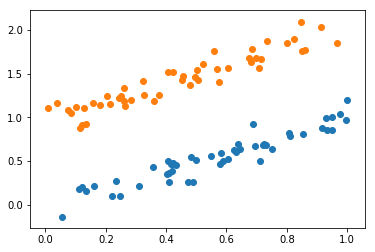

In [9]:
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1])
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])

In [45]:
class SVM:
    def __init__(self):
        pass
    def kernel(self, x0, x1):
#         d = x0 - x1
#         d = np.exp(-np.dot(d, d.T))
#         return d
        d = np.dot(x0, x1) ** 2
        return d
        
    def fit(self, X, y):
        n_samples = len(X)
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(i, n_samples):
                K[i, j] = self.kernel(X[i], X[j])
                K[j, i] = K[i, j]
        
        P = matrix(np.outer(y, y) * K, tc='d')
        q = matrix(-np.ones(n_samples), tc='d')
        G = matrix(-np.identity(n_samples), tc='d')
        h = matrix(np.zeros(n_samples), tc='d')
        A = matrix(y.reshape(1, -1), tc='d')
        b = matrix(np.zeros(1), tc='d')
        
        solution = solvers.qp(P=P, q=q, G=G, h=h, A=A, b=b)
        alphas = np.array(solution['x']).flatten()
        self.support_vectors_indices = np.where(alphas > 1e-5)[0]
        self.support_vectors = X[self.support_vectors_indices]
        labels = y[self.support_vectors_indices]
        alphas = alphas[self.support_vectors_indices]
        self.alpha_labels = labels * alphas
        self.w = np.dot(self.alpha_labels, self.support_vectors)

        max_i = np.max(np.dot(self.support_vectors[labels == -1], self.w.T))
        min_i = np.min(np.dot(self.support_vectors[labels == 1], self.w.T))
        self.b = - (max_i + min_i) / 2
        
        return solution
    
    def predict(self, X):
        return np.array(list(map(self.predict_one, X)))
    
    def predict_one(self, X):
        k = np.zeros(len(self.support_vectors))
        for i in range(self.support_vectors.shape[0]):
            k[i] = self.kernel(self.support_vectors[i], X)
        y_pred = np.dot(self.alpha_labels, k.reshape(-1, 1)) + self.b

        return y_pred 

In [46]:
model = SVM()

In [47]:
solution = model.fit(X, y)

     pcost       dcost       gap    pres   dres
 0: -1.0966e+01 -2.4096e+01  3e+02  2e+01  2e+00
 1: -9.5861e+00 -1.6969e+01  7e+01  4e+00  3e-01
 2: -5.2566e+00 -1.3113e+01  2e+01  8e-01  8e-02
 3: -5.4414e+00 -9.1067e+00  8e+00  3e-01  2e-02
 4: -5.6472e+00 -8.5971e+00  3e+00  3e-15  3e-15
 5: -7.3917e+00 -8.1996e+00  8e-01  5e-15  3e-15
 6: -7.8995e+00 -7.9482e+00  5e-02  1e-15  3e-15
 7: -7.9444e+00 -7.9449e+00  5e-04  2e-15  4e-15
 8: -7.9449e+00 -7.9449e+00  5e-06  2e-15  3e-15
Optimal solution found.


In [48]:
model.w

array([-1.74992442,  4.35129411])

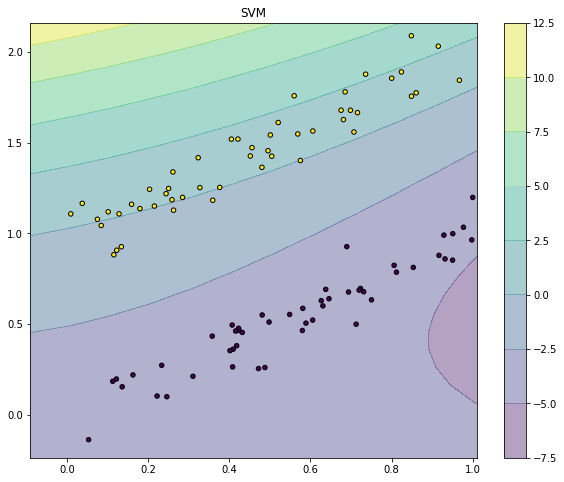

In [49]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c = axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,
                              s=20, edgecolor='k')
axarr.set_title('SVM')
cbar = f.colorbar(c)

plt.show()

In [51]:
y[53]

1.0